In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
raw_file_train=pd.read_csv('training.csv')

In [3]:
raw_file_test=pd.read_csv('test.csv')

In [4]:
raw_all_data=pd.concat((raw_file_train.loc[:,'Student ID':'BS'],raw_file_test.loc[:,'Student ID':'BS']))

In [5]:
for i in raw_file_train.index:
    if raw_file_train.loc[i,'WS'] == 'J':
        raw_file_train.loc[i,'WS'] = 1
    if raw_file_train.loc[i,'WS'] == 'K':
        raw_file_train.loc[i,'WS'] = 2
    if raw_file_train.loc[i,'WS'] == 'L':
        raw_file_train.loc[i,'WS'] = 3
    if raw_file_train.loc[i,'WS'] == 'M':
        raw_file_train.loc[i,'WS'] = 4
    if raw_file_train.loc[i,'WS'] == 'N':
        raw_file_train.loc[i,'WS'] = 5
    if raw_file_train.loc[i,'WS'] == 'O':
        raw_file_train.loc[i,'WS'] = 6
    if raw_file_train.loc[i,'WS'] == 'P':
        raw_file_train.loc[i,'WS'] = 7
    if raw_file_train.loc[i,'WS'] == 'Q':
        raw_file_train.loc[i,'WS'] = 8
    if raw_file_train.loc[i,'WS'] == 'R':
        raw_file_train.loc[i,'WS'] = 9
    if raw_file_train.loc[i,'WS'] == 'S':
        raw_file_train.loc[i,'WS'] = 10
    if raw_file_train.loc[i,'WS'] == 'T':
        raw_file_train.loc[i,'WS'] = 11

In [6]:
for i in raw_file_test.index:
    if raw_file_test.loc[i,'WS'] == 'J':
        raw_file_test.loc[i,'WS'] = 1
    if raw_file_test.loc[i,'WS'] == 'K':
        raw_file_test.loc[i,'WS'] = 2
    if raw_file_test.loc[i,'WS'] == 'L':
        raw_file_test.loc[i,'WS'] = 3
    if raw_file_test.loc[i,'WS'] == 'M':
        raw_file_test.loc[i,'WS'] = 4
    if raw_file_test.loc[i,'WS'] == 'N':
        raw_file_test.loc[i,'WS'] = 5
    if raw_file_test.loc[i,'WS'] == 'O':
        raw_file_test.loc[i,'WS'] = 6
    if raw_file_test.loc[i,'WS'] == 'P':
        raw_file_test.loc[i,'WS'] = 7
    if raw_file_test.loc[i,'WS'] == 'Q':
        raw_file_test.loc[i,'WS'] = 8
    if raw_file_test.loc[i,'WS'] == 'R':
        raw_file_test.loc[i,'WS'] = 9
    if raw_file_test.loc[i,'WS'] == 'S':
        raw_file_test.loc[i,'WS'] = 10
    if raw_file_test.loc[i,'WS'] == 'T':
        raw_file_test.loc[i,'WS'] = 11

In [7]:
processed_train=raw_file_train.drop(['MCAT Total'], axis=1)
processed_test=raw_file_test.drop(['MCAT Total','Probablitiy of acceptance'], axis=1)

In [8]:
processed_train_2=processed_train.ix[processed_train['Answer key'] <=2 ]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [9]:
processed_train_2["Undergrad Major Classification"]=""

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
major_categories=raw_all_data['Undergrad Major'].unique()
major_categories.sort()

In [11]:
major_categories

array(['African American Studies|Psychology',
       'African and African-American Studies', 'Anthropology',
       'Art History', 'Asian and African Languages and Literature|Biology',
       'Asian and African Literature and Languages|Biology',
       'Biological Anthropology & Anatomy|Biology',
       'Biological Anthropology and Anatomy',
       'Biological Anthropology and Anatomy|Biology', 'Biology',
       'Biology (Cell and Molecular)', 'Biology (Genetics Concentration)',
       'Biology (Neuroscience Concentration)',
       'Biology with a Concentration in Pharmacology',
       'Biology, Concentration in Cell & Molecular Biology',
       'Biology, Concentration in Evolutionary Biology',
       'Biology, with a concentration in Pharmacology|Psychology, with a concentration in Neuroscience',
       'Biology; Neuroscience concentration', 'Biology|Biology',
       'Biology|Biomedical Engineering', 'Biology|Chemistry',
       'Biology|Computer Science', 'Biology|History', 'Biology|M

In [12]:
processed_train_2

,Student ID,Undergrad Major,CU BCPM GPA,CU AO GPA,CU CUM GPA,VR,PS,WS,BS,Answer key,Undergrad Major Classification
2,1003,Biology|Music,3.69,3.84,3.77,10,12,5,11,0,
12,1013,Biomedical Engineering,4.00,3.98,3.99,11,13,4,11,1,
13,1014,Psychology,3.00,3.52,3.28,7,8,8,10,0,
15,1016,Biology,3.51,3.56,3.53,11,10,5,12,0,
16,1017,Biomedical Engineering,3.69,3.64,3.67,11,14,4,14,1,
23,1024,Women's Studies,3.25,3.80,3.59,11,10,6,11,0,
26,1027,Biology,3.35,3.73,3.55,11,11,6,10,0,
27,1028,Biology,3.29,3.80,3.57,10,11,8,11,0,
28,1029,Biology,3.69,3.78,3.72,9,13,9,12,0,
29,1030,Biomedical Engineering|Electrical Engineering,2.78,2.87,2.84,13,13,8,11,0,


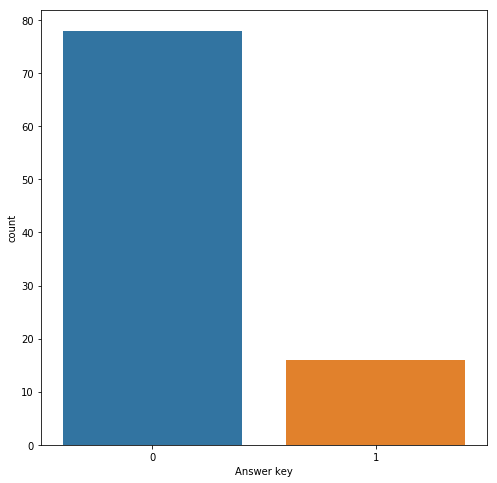

In [13]:
plt.subplots(figsize=(8,8))
sns.countplot(x='Answer key',data=processed_train_2)
plt.show()

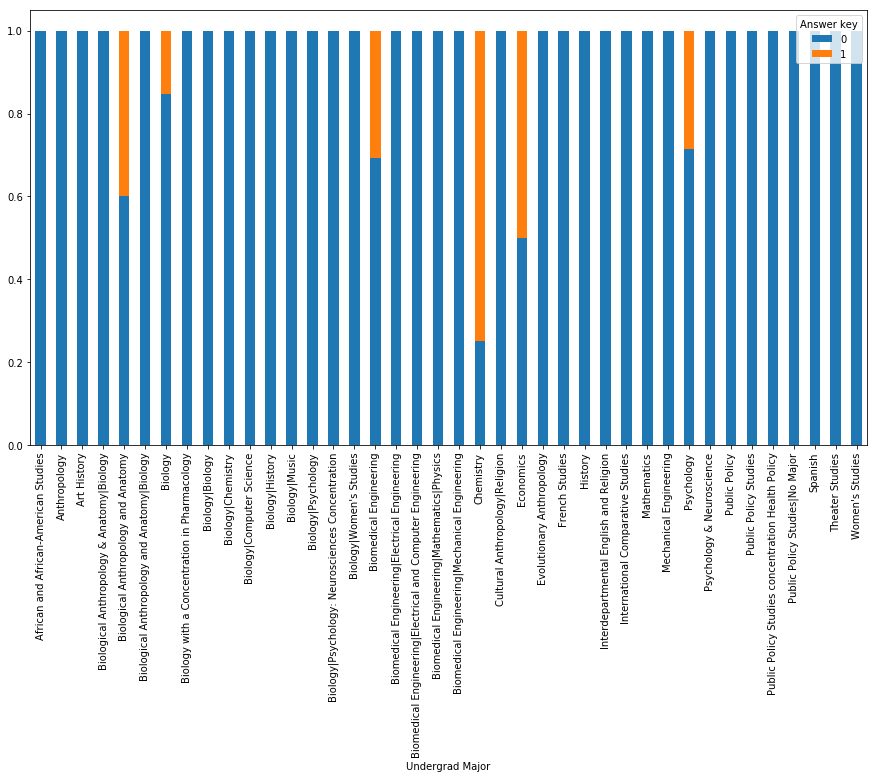

In [14]:
table=pd.crosstab(processed_train_2['Undergrad Major'], processed_train_2['Answer key'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(15,8)) 

In [15]:
#Will need to categorize(classify) the majors into a few categories.
# Category 1:- Biology, biomedical and chemistry
# Category 2:- Other STEM and Pyschology
# Category 3:- All other Majors

In [16]:
for i in processed_train_2.index:
    if 'Eng' in processed_train_2.loc[i,'Undergrad Major'] or 'Math' in processed_train_2.loc[i,'Undergrad Major']:
        processed_train_2.loc[i,'Undergrad Major Classification'] = 'STEM_Other'
    if 'Bio' in processed_train_2.loc[i,'Undergrad Major'] or 'Chem' in processed_train_2.loc[i, 'Undergrad Major'] or 'Psy' in processed_train_2.loc[i, 'Undergrad Major']:
        processed_train_2.loc[i,'Undergrad Major Classification'] = 'Bio/Chem/Pys'
    else:
        processed_train_2.loc[i,'Undergrad Major Classification'] = 'Other'

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
processed_train_2

,Student ID,Undergrad Major,CU BCPM GPA,CU AO GPA,CU CUM GPA,VR,PS,WS,BS,Answer key,Undergrad Major Classification
2,1003,Biology|Music,3.69,3.84,3.77,10,12,5,11,0,Bio/Chem/Pys
12,1013,Biomedical Engineering,4.00,3.98,3.99,11,13,4,11,1,Bio/Chem/Pys
13,1014,Psychology,3.00,3.52,3.28,7,8,8,10,0,Bio/Chem/Pys
15,1016,Biology,3.51,3.56,3.53,11,10,5,12,0,Bio/Chem/Pys
16,1017,Biomedical Engineering,3.69,3.64,3.67,11,14,4,14,1,Bio/Chem/Pys
23,1024,Women's Studies,3.25,3.80,3.59,11,10,6,11,0,Other
26,1027,Biology,3.35,3.73,3.55,11,11,6,10,0,Bio/Chem/Pys
27,1028,Biology,3.29,3.80,3.57,10,11,8,11,0,Bio/Chem/Pys
28,1029,Biology,3.69,3.78,3.72,9,13,9,12,0,Bio/Chem/Pys
29,1030,Biomedical Engineering|Electrical Engineering,2.78,2.87,2.84,13,13,8,11,0,Bio/Chem/Pys


In [18]:
processed_train_2=processed_train_2.drop(['Undergrad Major'],axis=1)

In [19]:
category_variables=['Undergrad Major Classification']
for var in category_variables:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(processed_train_2[var],prefix=var)
    raw_data1=processed_train_2.join(cat_list)
    processed_train_2=raw_data1

In [20]:
processed_train_2

,Student ID,CU BCPM GPA,CU AO GPA,CU CUM GPA,VR,PS,WS,BS,Answer key,Undergrad Major Classification,Undergrad Major Classification_Bio/Chem/Pys,Undergrad Major Classification_Other
2,1003,3.69,3.84,3.77,10,12,5,11,0,Bio/Chem/Pys,1,0
12,1013,4.00,3.98,3.99,11,13,4,11,1,Bio/Chem/Pys,1,0
13,1014,3.00,3.52,3.28,7,8,8,10,0,Bio/Chem/Pys,1,0
15,1016,3.51,3.56,3.53,11,10,5,12,0,Bio/Chem/Pys,1,0
16,1017,3.69,3.64,3.67,11,14,4,14,1,Bio/Chem/Pys,1,0
23,1024,3.25,3.80,3.59,11,10,6,11,0,Other,0,1
26,1027,3.35,3.73,3.55,11,11,6,10,0,Bio/Chem/Pys,1,0
27,1028,3.29,3.80,3.57,10,11,8,11,0,Bio/Chem/Pys,1,0
28,1029,3.69,3.78,3.72,9,13,9,12,0,Bio/Chem/Pys,1,0
29,1030,2.78,2.87,2.84,13,13,8,11,0,Bio/Chem/Pys,1,0


In [21]:
processed_train_2=processed_train_2.drop(['Undergrad Major Classification'],axis=1)

In [22]:
processed_train_2

,Student ID,CU BCPM GPA,CU AO GPA,CU CUM GPA,VR,PS,WS,BS,Answer key,Undergrad Major Classification_Bio/Chem/Pys,Undergrad Major Classification_Other
2,1003,3.69,3.84,3.77,10,12,5,11,0,1,0
12,1013,4.00,3.98,3.99,11,13,4,11,1,1,0
13,1014,3.00,3.52,3.28,7,8,8,10,0,1,0
15,1016,3.51,3.56,3.53,11,10,5,12,0,1,0
16,1017,3.69,3.64,3.67,11,14,4,14,1,1,0
23,1024,3.25,3.80,3.59,11,10,6,11,0,0,1
26,1027,3.35,3.73,3.55,11,11,6,10,0,1,0
27,1028,3.29,3.80,3.57,10,11,8,11,0,1,0
28,1029,3.69,3.78,3.72,9,13,9,12,0,1,0
29,1030,2.78,2.87,2.84,13,13,8,11,0,1,0


In [23]:
processed_train_2_x=pd.DataFrame(processed_train_2,columns=['CU BCPM GPA','CU AO GPA','CU CUM GPA','VR','PS','WS','BS','Undergrad Major Classification_Bio/Chem/Pys','Undergrad Major Classification_Other'])
processed_train_2_y=pd.DataFrame(processed_train_2,columns=['Answer key'])

In [25]:
lin_reg=linear_model.LinearRegression().fit(processed_train_2_x, processed_train_2_y)

In [31]:
processed_test

,Student ID,Undergrad Major,CU BCPM GPA,CU AO GPA,CU CUM GPA,VR,PS,WS,BS
0,2001,No Major|Biomedical Engineering|Mechanical Eng...,3.89,3.92,3.91,11,14,9,12
1,2002,Biology,3.95,3.79,3.90,9,11,8,12
2,2003,Biological Anthropology and Anatomy,3.93,3.89,3.91,11,12,9,12
3,2004,History,2.99,3.54,3.37,10,11,9,12
4,2005,"Biology, Concentration in Cell & Molecular Bio...",3.03,3.47,3.23,11,11,9,11
5,2006,Biological Anthropology and Anatomy,3.18,3.25,3.21,10,10,5,11
6,2007,Biology|Psychology,3.16,3.67,3.38,11,13,6,10
7,2008,Biology,3.71,3.89,3.81,11,13,10,13
8,2009,Biological Anthropology and Anatomy,3.57,3.64,3.60,10,11,6,10
9,2010,Biology,3.30,3.76,3.52,11,13,7,10


In [36]:
for i in processed_test.index:
    if 'Eng' in processed_test.loc[i,'Undergrad Major'] or 'Math' in processed_test.loc[i,'Undergrad Major']:
        processed_test.loc[i,'Undergrad Major Classification'] = 'STEM_Other'
    if 'Bio' in processed_test.loc[i,'Undergrad Major'] or 'Chem' in processed_test.loc[i, 'Undergrad Major'] or 'Psy' in processed_test.loc[i, 'Undergrad Major']:
        processed_test.loc[i,'Undergrad Major Classification'] = 'Bio/Chem/Pys'
    else:
        processed_test.loc[i,'Undergrad Major Classification'] = 'Other'

In [38]:
processed_test=processed_test.drop(['Undergrad Major'],axis=1)

In [40]:
category_variables=['Undergrad Major Classification']
for var in category_variables:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(processed_test[var],prefix=var)
    raw_data1=processed_test.join(cat_list)
    processed_test=raw_data1

In [43]:
processed_test=processed_test.drop(['Undergrad Major Classification'],axis=1)

,Student ID,CU BCPM GPA,CU AO GPA,CU CUM GPA,VR,PS,WS,BS,Undergrad Major Classification_Bio/Chem/Pys,Undergrad Major Classification_Other
0,2001,3.89,3.92,3.91,11,14,9,12,1,0
1,2002,3.95,3.79,3.90,9,11,8,12,1,0
2,2003,3.93,3.89,3.91,11,12,9,12,1,0
3,2004,2.99,3.54,3.37,10,11,9,12,0,1
4,2005,3.03,3.47,3.23,11,11,9,11,1,0
5,2006,3.18,3.25,3.21,10,10,5,11,1,0
6,2007,3.16,3.67,3.38,11,13,6,10,1,0
7,2008,3.71,3.89,3.81,11,13,10,13,1,0
8,2009,3.57,3.64,3.60,10,11,6,10,1,0
9,2010,3.30,3.76,3.52,11,13,7,10,1,0


In [45]:
processed_test_x=pd.DataFrame(processed_test,columns=['CU BCPM GPA','CU AO GPA','CU CUM GPA','VR','PS','WS','BS','Undergrad Major Classification_Bio/Chem/Pys','Undergrad Major Classification_Other'])

In [47]:
lin_reg_predict=lin_reg.predict(processed_test_x)

In [49]:
for i in range(len(lin_reg_predict)):
    print(lin_reg_predict[i])

[ 0.30443787]
[ 0.41562947]
[ 0.3164966]
[ 0.09107667]
[ 0.05826063]
[ 0.13157993]
[ 0.01044927]
[ 0.29260045]
[ 0.1958353]
[ 0.0805998]
[ 0.17643425]
[ 0.31930735]
[ 0.11225918]
[ 0.04511066]
[ 0.27609216]
[ 0.1156544]
[ 0.34411738]
[ 0.23072693]
[-0.08339296]
[ 0.17983635]
[ 0.14601903]
[ 0.15321638]
[ 0.18995987]
[ 0.10403489]
[ 0.18869942]
[ 0.20537766]
[ 0.1269479]
[ 0.35654636]
[ 0.03836208]
[ 0.16964033]
[-0.02504027]
[ 0.25760919]
[ 0.21328477]
[ 0.34175842]
[ 0.23617968]
[ 0.08271662]
[ 0.14932339]
[ 0.18956514]
[ 0.04239296]
[ 0.21605983]
[ 0.27168956]
[ 0.23667071]
[ 0.08673929]
[ 0.32399419]
[-0.00891845]
[ 0.03495237]
[ 0.24201814]
[ 0.33905837]
[ 0.26300342]
[ 0.11111171]
[ 0.36054769]
[ 0.32711834]
[ 0.12594905]
[ 0.02095922]
[ 0.26486436]
[ 0.04349987]
[ 0.13749015]
[ 0.31427614]
[ 0.26939786]
[ 0.28816879]
[ 0.28368003]
[ 0.07764433]
[ 0.07149786]
[ 0.19897281]
[ 0.17007654]
[ 0.28866157]
[ 0.2454435]
[ 0.07633187]
[ 0.18680837]
[ 0.29297122]
[ 0.34652569]
[ 0.11515708

In [52]:
log_reg=linear_model.LogisticRegression().fit(processed_train_2_x, processed_train_2_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
log_reg_predict=log_reg.predict(processed_test_x)

In [55]:
for i in range(len(log_reg_predict)):
    print(log_reg_predict[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
